In [41]:
import pandas as pd

url = "https://raw.githubusercontent.com/GrandmaCan/ML/main/Resgression/Salary_Data.csv"

data = pd.read_csv(url)
data
# y = w*x + b
x = data["YearsExperience"]
y = data["Salary"]

In [42]:
w = 10
b = 0
y_pred = w*x +b
cost = (y-y_pred)**2
cost.sum() / len(x)

602.547878787879

In [43]:
def compute_cost(x, y ,w ,b):
   y_pred = w*x +b
   cost = (y-y_pred)**2 #cost 為(真實值-預測值)**2
   cost = cost.sum() / len(x)

   return cost

In [44]:
compute_cost(x, y, 8, 34)

43.95636363636364

In [45]:
# b = 0 w = -100~100 cost會是多少
costs=[]
for w in range(-100 ,101):
  cost = compute_cost(x, y, w, 0)
  costs.append(cost)
costs

[420951.08121212124,
 413557.2063636363,
 406228.88242424245,
 398966.1093939394,
 391768.8872727272,
 384637.21606060606,
 377571.0957575757,
 370570.52636363637,
 363635.5078787879,
 356766.0403030302,
 349962.12363636366,
 343223.7578787879,
 336550.94303030305,
 329943.6790909091,
 323401.966060606,
 316925.8039393939,
 310515.19272727263,
 304170.13242424245,
 297890.623030303,
 291676.6645454545,
 285528.25696969696,
 279445.40030303027,
 273428.0945454546,
 267476.33969696966,
 261590.1357575757,
 255769.48272727273,
 250014.38060606056,
 244324.82939393938,
 238700.82909090907,
 233142.3796969697,
 227649.4812121212,
 222222.13363636364,
 216860.33696969692,
 211564.0912121212,
 206333.39636363636,
 201168.25242424244,
 196068.6593939394,
 191034.61727272722,
 186066.12606060607,
 181163.18575757576,
 176325.79636363636,
 171553.95787878786,
 166847.67030303032,
 162206.93363636362,
 157631.7478787879,
 153122.113030303,
 148678.02909090905,
 144299.49606060603,
 139986.5139393

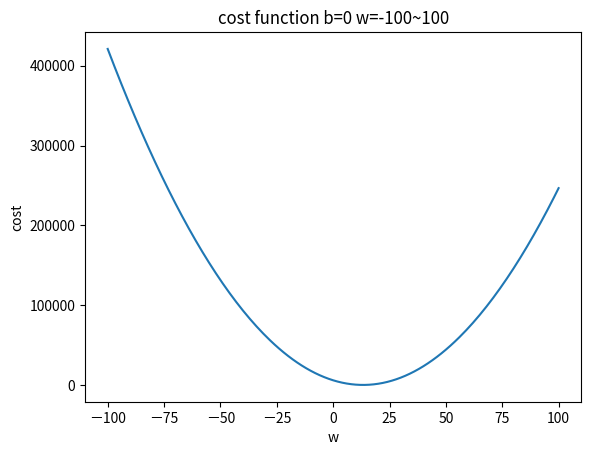

In [46]:
import matplotlib.pyplot as plt
#plt.scatter(range(-100 ,101) ,costs)
plt.plot(range(-100 ,101) ,costs)
plt.title("cost function b=0 w=-100~100")
plt.xlabel("w")
plt.ylabel("cost")
plt.show()

In [47]:
# w = -100~100 b=-100~100 的cost
import numpy as np
ws = np.arange(-100 ,101)
bs = np.arange(-100 ,101)
costs = np.zeros([201 ,201])
i = 0
for w in ws:
  j = 0
  for b in bs:
    cost = compute_cost(x, y ,w ,b)
    costs[i,j] = cost
    j = j+1
  i = i+1

costs


array([[543097.74787879, 541777.28121212, 540458.81454545, ...,
        320651.34787879, 319726.88121212, 318804.41454545],
       [534727.50939394, 533416.80636364, 532108.10333333, ...,
        314214.30939394, 313299.60636364, 312386.90333333],
       [526422.82181818, 525121.88242424, 523822.9430303 , ...,
        307842.82181818, 306937.88242424, 306034.9430303 ],
       ...,
       [164229.90787879, 164842.64121212, 165457.37454545, ...,
        324557.10787879, 325565.84121212, 326576.57454545],
       [168838.74939394, 169461.24636364, 170085.74333333, ...,
        331099.14939394, 332117.64636364, 333138.14333333],
       [173513.14181818, 174145.40242424, 174779.6630303 , ...,
        337706.74181818, 338735.00242424, 339765.2630303 ]])

In [48]:
!pip install wget
import wget
wget.download("https://github.com/zxc83118/-save/blob/main/ChineseFont.ttf")

'ChineseFont (3).ttf'

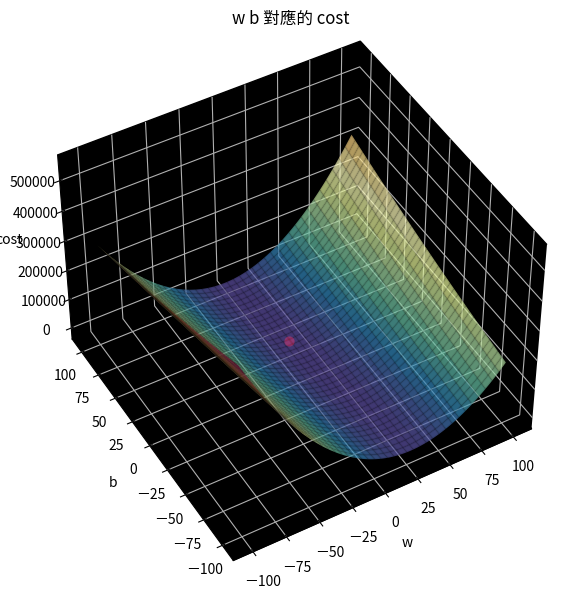

當w=[9] ,b=[29] 會有最小cost:[32.69484848]


In [51]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import fontManager
fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

plt.figure(figsize=(7 ,7)) #調整畫出的圖的大小

ax = plt.axes(projection="3d")
ax.view_init(45 ,-120) #上下選轉角度 左右旋轉角度
ax.xaxis.set_pane_color((0,0,0))
ax.yaxis.set_pane_color((0,0,0))
ax.zaxis.set_pane_color((0,0,0))
b_grid ,w_grid = np.meshgrid(bs ,ws)
ax.plot_surface(w_grid ,b_grid ,costs ,cmap="Spectral_r" ,alpha = 0.7) #cmap調整匯出的曲線的顏色,alpha使圖面變為透明
ax.plot_wireframe(w_grid ,b_grid ,costs ,color="black" ,alpha = 0.1) #加一個邊框設定為黑色

ax.set_title("w b 對應的 cost")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("cost")

w_index ,b_index = np.where(costs == np.min(costs)) #找出最低的cost
ax.scatter(ws[w_index] ,bs[b_index] ,costs[w_index ,b_index] ,color="red" ,s=40) #畫出最小cost的點(修改顏色和大小)

plt.show()
print(f"當w={ws[w_index]} ,b={bs[b_index]} 會有最小cost:{costs[w_index ,b_index]}") #找出最低cost的w和b的值